In [1]:
# Water Quality Classification - ML Model

# Step 1: Load Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [2]:
# Step 2: Load Dataset
dataset_path = "water_quality_dataset.csv"  # Update path if needed
df = pd.read_csv(dataset_path, encoding='ISO-8859-1')

In [3]:
# Step 3: Data Preprocessing (Updated to save scaler)
df.fillna(df.mean(numeric_only=True), inplace=True)
df['Target'] = df['Water Type Probability'].map({'Organic': 1, 'Inorganic': 0})
df.drop(columns=['Water Type Probability'], inplace=True)

X = df.drop('Target', axis=1)
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.joblib')  # Save the scaler

['scaler.joblib']

In [4]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# Step 5: Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

model_accuracies = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc
    trained_models[name] = model

c:\Users\KIIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:21:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


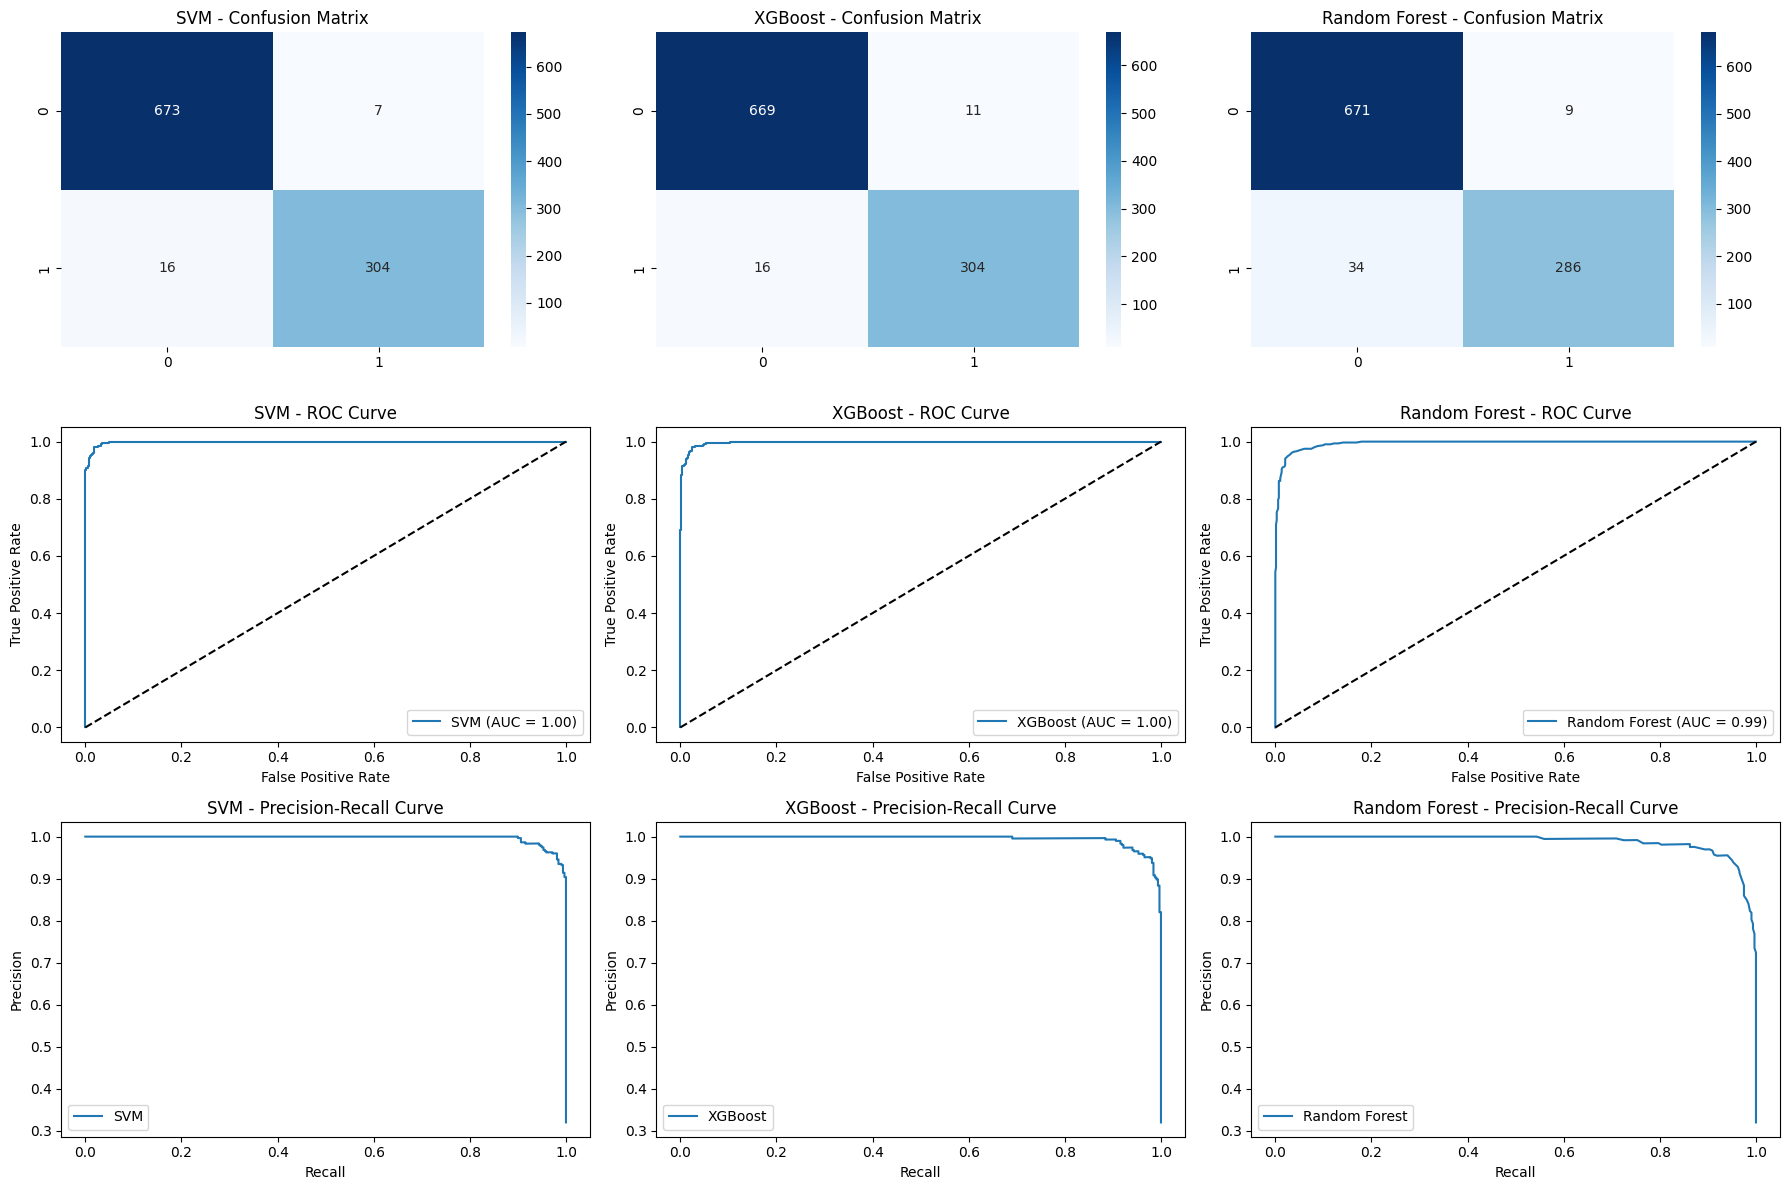

In [6]:
# Step 6: Evaluate Top Models (Confusion Matrix, ROC, Precision-Recall)
plt.figure(figsize=(18, 12))
top_models = ["SVM", "XGBoost", "Random Forest"]

for idx, model_name in enumerate(top_models, 1):
    model = trained_models[model_name]
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    # Confusion Matrix
    plt.subplot(3, 3, idx)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')

    # ROC Curve
    plt.subplot(3, 3, idx + 3)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title(f'{model_name} - ROC Curve')

    # Precision-Recall Curve
    plt.subplot(3, 3, idx + 6)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} - Precision-Recall Curve')
    plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Step 7: Save the Best Model (XGBoost)
joblib.dump(trained_models["XGBoost"], "water_quality_xgboost_model.pkl")

print("✅ Best Model (XGBoost) saved as 'water_quality_xgboost_model.pkl'")


✅ Best Model (XGBoost) saved as 'water_quality_xgboost_model.pkl'
